In [73]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import time


class CliffWalkingEnv:
    def __init__(self, ncol, nrow):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0  # 记录当前智能体位置的横坐标
        self.y = self.nrow - 1  # 记录当前智能体位置的纵坐标

    def step(self, action):  # 外部调用这个函数来改变当前位置
        # 4种动作, change[0]:上, change[1]:下, change[2]:左, change[3]:右。坐标系原点(0,0)
        # 定义在左上角
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0]))
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:  # 下一个位置在悬崖或者目标
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state, reward, done

    def reset(self):  # 回归初始状态,起点在左上角
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x

In [74]:
class DynaQ:
    """ Dyna-Q算法 """
    def __init__(self,
                 ncol,
                 nrow,
                 epsilon,
                 alpha,
                 gamma,
                 n_planning,
                 n_action=4):
        self.Q_table = np.zeros([nrow * ncol, n_action])  # 初始化Q(s,a)表格
        self.n_action = n_action  # 动作个数
        self.alpha = alpha  # 学习率
        self.gamma = gamma  # 折扣因子
        self.epsilon = epsilon  # epsilon-贪婪策略中的参数

        self.n_planning = n_planning  #执行Q-planning的次数, 对应1次Q-learning
        self.model = dict()  # 环境模型

    def take_action(self, state):  # 选取下一步的操作
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:
            action = np.argmax(self.Q_table[state])
        return action

    def q_learning(self, s0, a0, r, s1):
        td_error = r + self.gamma * self.Q_table[s1].max(
        ) - self.Q_table[s0, a0]
        self.Q_table[s0, a0] += self.alpha * td_error

    def update(self, s0, a0, r, s1):
        self.q_learning(s0, a0, r, s1)
        self.model[(s0, a0)] = r, s1  # 将数据添加到模型中
        for _ in range(self.n_planning):  # Q-planning循环
            # 随机选择曾经遇到过的状态动作对
            (s, a), (r, s_) = random.choice(list(self.model.items()))
            self.q_learning(s, a, r, s_)

Q-planning步数为：0


Iteration 0: 100%|█| 30/30 [00:00<00:00, 171.74it/s, episode=30, return=-138.400
Iteration 1: 100%|█| 30/30 [00:00<00:00, 1051.89it/s, episode=60, return=-64.100
Iteration 2: 100%|█| 30/30 [00:00<00:00, 3109.73it/s, episode=90, return=-46.000
Iteration 3: 100%|█| 30/30 [00:00<00:00, 744.51it/s, episode=120, return=-38.000
Iteration 4: 100%|█| 30/30 [00:00<00:00, 3940.16it/s, episode=150, return=-28.60
Iteration 5: 100%|█| 30/30 [00:00<00:00, 4960.35it/s, episode=180, return=-25.30
Iteration 6: 100%|█| 30/30 [00:00<00:00, 2464.68it/s, episode=210, return=-23.60
Iteration 7: 100%|█| 30/30 [00:00<00:00, 5826.50it/s, episode=240, return=-20.10
Iteration 8: 100%|█| 30/30 [00:00<00:00, 7192.29it/s, episode=270, return=-17.10
Iteration 9: 100%|█| 30/30 [00:00<00:00, 7705.87it/s, episode=300, return=-16.50


Q-planning步数为：2


Iteration 0: 100%|█| 30/30 [00:00<00:00, 1415.23it/s, episode=30, return=-53.800
Iteration 1: 100%|█| 30/30 [00:00<00:00, 1965.68it/s, episode=60, return=-37.100
Iteration 2: 100%|█| 30/30 [00:00<00:00, 2462.26it/s, episode=90, return=-23.600
Iteration 3: 100%|█| 30/30 [00:00<00:00, 3204.12it/s, episode=120, return=-18.50
Iteration 4: 100%|█| 30/30 [00:00<00:00, 3485.19it/s, episode=150, return=-16.40
Iteration 5: 100%|█| 30/30 [00:00<00:00, 3821.69it/s, episode=180, return=-16.40
Iteration 6: 100%|█| 30/30 [00:00<00:00, 3912.96it/s, episode=210, return=-13.40
Iteration 7: 100%|█| 30/30 [00:00<00:00, 4415.68it/s, episode=240, return=-13.20
Iteration 8: 100%|█| 30/30 [00:00<00:00, 3844.58it/s, episode=270, return=-13.20
Iteration 9: 100%|█| 30/30 [00:00<00:00, 4433.88it/s, episode=300, return=-13.50


Q-planning步数为：20


Iteration 1: 100%|█| 30/30 [00:00<00:00, 938.26it/s, episode=60, return=-13.600]
Iteration 2: 100%|█| 30/30 [00:00<00:00, 1009.59it/s, episode=90, return=-13.000
Iteration 3: 100%|█| 30/30 [00:00<00:00, 985.77it/s, episode=120, return=-13.500
Iteration 4: 100%|█| 30/30 [00:00<00:00, 978.89it/s, episode=150, return=-13.500
Iteration 5: 100%|█| 30/30 [00:00<00:00, 974.88it/s, episode=180, return=-13.000
Iteration 6: 100%|█| 30/30 [00:00<00:00, 1009.66it/s, episode=210, return=-22.00
Iteration 7: 100%|█| 30/30 [00:00<00:00, 972.55it/s, episode=240, return=-23.200
Iteration 8: 100%|█| 30/30 [00:00<00:00, 990.81it/s, episode=270, return=-13.000
Iteration 9: 100%|█| 30/30 [00:00<00:00, 998.00it/s, episode=300, return=-13.400


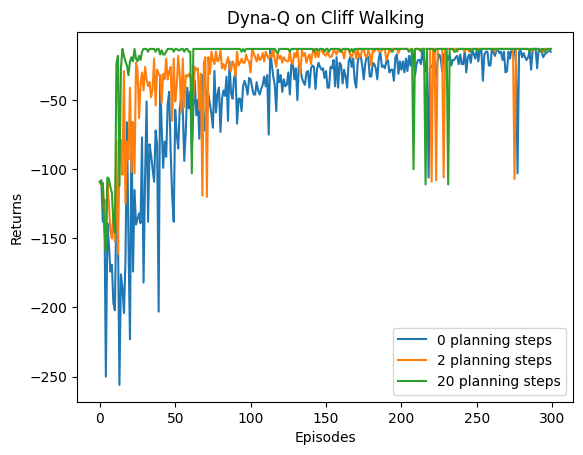

In [75]:
def DynaQ_CliffWalking(n_planning):
    ncol = 12
    nrow = 4
    env = CliffWalkingEnv(ncol, nrow)
    epsilon = 0.01
    alpha = 0.1
    gamma = 0.9
    agent = DynaQ(ncol, nrow, epsilon, alpha, gamma, n_planning)
    num_episodes = 300  # 智能体在环境中运行多少条序列

    return_list = []  # 记录每一条序列的回报
    for i in range(10):  # 显示10个进度条
        # tqdm的进度条功能
        with tqdm(total=int(num_episodes / 10),
                  desc='Iteration %d' % i) as pbar:
            for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
                episode_return = 0
                state = env.reset()
                done = False
                while not done:
                    action = agent.take_action(state)
                    next_state, reward, done = env.step(action)
                    episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                    agent.update(state, action, reward, next_state)
                    state = next_state
                return_list.append(episode_return)
                if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                    pbar.set_postfix({
                        'episode':
                        '%d' % (num_episodes / 10 * i + i_episode + 1),
                        'return':
                        '%.3f' % np.mean(return_list[-10:])
                    })
                pbar.update(1)
    return return_list

np.random.seed(0)
random.seed(0)
n_planning_list = [0, 2, 20]
for n_planning in n_planning_list:
    print('Q-planning步数为：%d' % n_planning)
    time.sleep(0.5)
    return_list = DynaQ_CliffWalking(n_planning)
    episodes_list = list(range(len(return_list)))
    plt.plot(episodes_list,
             return_list,
             label=str(n_planning) + ' planning steps')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Dyna-Q on {}'.format('Cliff Walking'))
plt.show()

In [2]:
from minirl.core.dynaQ import DynaQ
import hirlite

tdb = hirlite.Rlite(encoding='utf8',path="test.db")

In [72]:
agent.get_rewards("local_model")

NameError: name 'agent' is not defined

In [3]:
def DynaQ_CliffWalking(n_planning):
    ncol = 12
    nrow = 4
    env = CliffWalkingEnv(ncol, nrow)
    epsilon = 0.01
    alpha = 0.1
    gamma = 0.9
    state_space = [i for i in range(nrow * ncol)]
    actions_list = [i for i in range(4)]
    agent = DynaQ(state_space=state_space,
        actions = actions_list,
        alpha=0.1,
        gamma=0.9,
        random_seed=0,
        eps=0.01,
        model_db=tdb,
        score_db=tdb,
        his_db=tdb,
        N=n_planning,  # no. of steps in planning phase
        n=1,)
    #agent = DynaQ(ncol, nrow, epsilon, alpha, gamma, n_planning)
    num_episodes = 300  # 智能体在环境中运行多少条序列

    return_list = []  # 记录每一条序列的回报
    for i in range(10):  # 显示10个进度条
        # tqdm的进度条功能
        with tqdm(total=int(num_episodes / 10),
                  desc='Iteration %d' % i) as pbar:
            for i_episode in range(int(num_episodes / 10)):  # 每个进度条的序列数
                episode_return = 0
                state = env.reset()

                done = False
                while not done:
                    action = agent.act(state,"local_model","local_model",use_doubleQ=False)
                    #print(agent.model)
                    #print(actions_list)
                    #action = random.choice(actions_list)
                    action = int(action)
                    next_state, reward, done = env.step(action)
                    #print(next_state,reward,type(reward))
                    episode_return += reward  # 这里回报的计算不进行折扣因子衰减
                    #agent.learn(state, reward, "local_model","local_model",use_doubleQ=F,use_dyna=True)
                    agent.update(state, action, reward, next_state,"local_model")
                    model_id="local_model"
                    score_key1 = f"{model_id}:{state}:Qscore1"

                    f=agent._score_db.zrange(score_key1,'0','0')
                    #print(f,score_key1)
                    state = next_state
                return_list.append(episode_return)
                if (i_episode + 1) % 10 == 0:  # 每10条序列打印一下这10条序列的平均回报
                    pbar.set_postfix({
                        'episode':
                        '%d' % (num_episodes / 10 * i + i_episode + 1),
                        'return':
                        '%.3f' % np.mean(return_list[-10:])
                    })
                pbar.update(1)
    return return_list

Q-planning步数为：20
simple two layer neural network based on numpy
creating nn: #input:20 #hidden:64 #output:[0, 1, 2, 3]


Iteration 2: 100%|█| 30/30 [01:39<00:00,  3.30s/it, episode=90, return=-391.700]
Iteration 3: 100%|█| 30/30 [05:37<00:00, 11.25s/it, episode=120, return=-794.200
Iteration 4: 100%|█| 30/30 [05:05<00:00, 10.17s/it, episode=150, return=-104.600
Iteration 9: 100%|█| 30/30 [00:08<00:00,  3.65it/s, episode=300, return=-17.300]


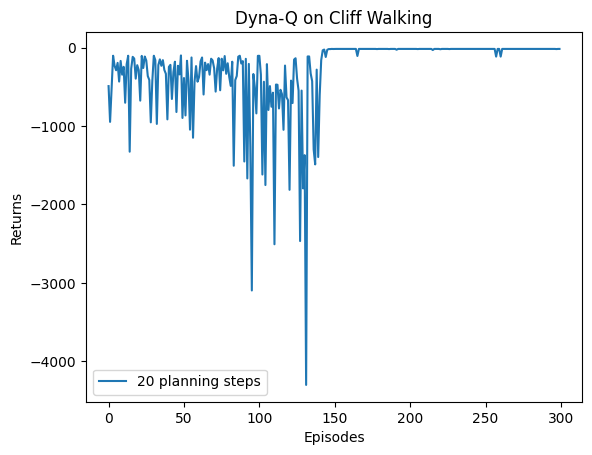

In [4]:
np.random.seed(0)
random.seed(0)
n_planning_list = [20]
for n_planning in n_planning_list:
    print('Q-planning步数为：%d' % n_planning)
    time.sleep(0.5)
    return_list = DynaQ_CliffWalking(n_planning)
    episodes_list = list(range(len(return_list)))
    plt.plot(episodes_list,
             return_list,
             label=str(n_planning) + ' planning steps')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Dyna-Q on {}'.format('Cliff Walking'))
plt.show()

In [6]:
ncol = 12
nrow = 4
state_space = [i for i in range(nrow * ncol)]
actions_list = [i for i in range(4)]
agent = DynaQ(state_space=state_space,
        actions = actions_list,
        alpha=0.1,
        gamma=0.9,
        random_seed=0,
        eps=0.2,
        model_db=tdb,
        score_db=tdb,
        his_db=tdb,
        N=2,  # no. of steps in planning phase
        n=2,)
agent.get_rewards("local_model")

simple two layer neural network based on numpy
creating nn: #input:20 #hidden:64 #output:[0, 1, 2, 3]


deque([], maxlen=2)

In [14]:
agent.get_rewards("local_model")

deque([], maxlen=2)

In [25]:
t=agent.get_Q_state_value(
            1, 1, "local_model", model_id_suffix="qvalue1"
        )

type(t)

float

In [8]:
model_id = "local_model"
state = 36
score_key1 = f"{model_id}:{state}:Qscore1"

agent._score_db.zrange(score_key1,'0','0')

[]

In [15]:
np.random.choice([0,1,2,3],size=1).tolist()

[0]

In [22]:
agent._score_db.zrange("test",'0','0')

['a2']

In [11]:
agent._score_db.zadd("test","-10","a1")
agent._score_db.zadd("test","-101","a2")

NameError: name 'agent' is not defined

In [11]:
for i in range(10):
    explore = np.random.binomial(1, 0.01)
    print(explore)

0
0
0
0
0
0
1
0
0
0


In [12]:
tdb.zadd("test","-10","a1")

1

In [16]:
tdb.zrange("test",'0','0's)

['a1']

In [46]:
import pickle

In [64]:
tdb.lpush('qwe',pickle.dumps(["DC1","up"]))

1

In [65]:
tdb.lrange("qwe","0","0")

[b'\x80\x04\x95\x10\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x03DC1\x94\x8c\x02up\x94e.']

In [52]:
tdb.llen("qwe2")


0

In [56]:
tdb.exists("qwe")

1

In [61]:
tdb.delete("qwe")

0

In [60]:
tdb.lpop("qwe")


In [66]:
model=dict()

len(model.keys())

0

In [67]:
type(tdb.llen("qwe2"))

int

In [68]:
type(tdb.llen("qwe21"))

int

In [72]:
model_id="qwe21"
key=f"{model_id}:Hist"
f=tdb.llen(key)
f>0

False